# [CHECK HERE FIRST] Notes/Changes [Record Changes/Notes Below]

In [ ]:
### 11/23 Happy Birthday To Me..
##     Worked on everything, good for screenshot turn-in on Monday. -Nash

##   Unless You two want to look at something else, the code for the most part
##   is complete outside of maybe more graphing for neural networking or
##                         tweaking the attributes.
##        If you two are happy with the code, you two can primarily focus on
##            the powerpoint while conceptually understanding the code.
#                                    -Nash-

### 11/24
##  Changed:
#     -Second Neural Network uses SGD Optimizer to compare differences w/ Adam.
#                                    -Nash-
##  Fixes:
#     -Fixed Accuracy for both neural networks, percentages are looking good.
#                                    -Nash-

### 11/25
##  Added:
#     -Confusion Matrices Added in Neural Network Branch. -Nash
#     -Graph that shows both the epochs/losses of Adam & SGD. -Nash
#     -Bar Graph that shows the accuracy of our two optimization methods. -Nash
#     -As per Dr. K, MLP Neurals added at the very bottom. -Nash


### 11/26
##

### 11/27
##

### 11/28
##

# Sources - Decision Trees / Neural Networks

* [Geeks-for-Geeks: Decision Tree Implementation](https://www.geeksforgeeks.org/decision-tree-implementation-python/)

  *   **Gini Index** is a metric to measure how often a randomly chosen element would be incorrectly identified. An attribute with **lower** gini index should be preferred
  *   **Entropy** is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The **higher** the entropy the more the information content.



* [Scikit-Learn: Decision-Trees](https://scikit-learn.org/1.5/modules/tree.html)

* [Scikit-Learn: Neural-Networks](https://scikit-learn.org/1.5/modules/neural_networks_supervised.html)


# Videos & Sites
  * [Video - Pytorch For Beginners](https://www.youtube.com/watch?v=tHL5STNJKag)
  * [Guide - Pytorch.io](https://www.learnpytorch.io/)
  * [Video - Pytorch For Deep Learning 1:21:40](https://www.youtube.com/watch?v=Z_ikDlimN6A)
  * [Video - Neural Networks](https://www.youtube.com/watch?v=wu9IH1Xvdd4&list=PLzMcBGfZo4-lak7tiFDec5_ZMItiIIfmj&index=2)
  * The Playlist Below is awesome
    * [Playlist - Neural Network - Deep Learning w/ Pytorch](https://www.youtube.com/playlist?list=PLCC34OHNcOtpcgR9LEYSdi9r7XIbpkpK1)




# Importing Dataset

In [1]:
### Imports of packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## [Nash] - This is how I run my dataset, yours may vary.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

## [Nash] - Disregard naming of file
nm_DF =  pd.read_csv("/content/drive/MyDrive/DM-Project-1/DropoutData.csv")

## Separation of solely our columns
nm_DF_Columns = nm_DF.columns
##nm_DF_Columns
nm_DF

Mounted at /content/drive


,Marital status,Application Mode,Application Order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (2),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (Approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (Without Evalutations),Unemployment rate,Inflation Rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


# Splitting Dataset

In [3]:
## Output of initial columns
nm_DF.columns
nm_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Marital status                                   4424 non-null   int64  
 1   Application Mode                                 4424 non-null   int64  
 2   Application Order                                4424 non-null   int64  
 3   Course                                           4424 non-null   int64  
 4   Daytime/evening attendance                       4424 non-null   int64  
 5   Previous qualification                           4424 non-null   int64  
 6   Previous qualification (grade)                   4424 non-null   float64
 7   Nacionality                                      4424 non-null   int64  
 8   Mother's qualification                           4424 non-null   int64  
 9   Father's qualification        

In [50]:
## Setting Admission Grades as a separate DF
## Float 0-200
admin_Grade = pd.DataFrame(nm_DF['Admission Grade'])
# admin_Grade

marital_status = pd.DataFrame(nm_DF['Marital status'])


## Setting Gender as a separate DF
## From the website [Male->1 , Female->0]
gender = pd.DataFrame(nm_DF['Gender'])
# gender

## Setting Unemployment as a separate DF
unemployment = pd.DataFrame(nm_DF['Unemployment rate'])
# Unemployment

## Setting Age at enrollment as a separate DF
enroll_Age = pd.DataFrame({'Enrollment Age': nm_DF['Age at enrollment']},
                          dtype=np.float64)
# enroll_Age


## Setting target as a separate DF [Int64 DType *Vital for nn tensors later]
##   From the website [Dropout->0 , Enrolled->1, Graduate->2] at the end of the
##   normal duration of the course.
target = pd.DataFrame(nm_DF['Target'])
# target.info()

## Final Attribute Dataframe for our nn
## More attributes can be added/changed this is just what jumped out at me
final_attributes = pd.concat([admin_Grade,
                              enroll_Age,
                              unemployment], axis=1)


## Maybe will have a need for it later
'''
target['Dropout','Enrolled','Graduate'] = target['Target'].map({0:'Dropout', 1:'Enrolled', 2:'Graduate'})
'''
final_attributes

,Admission Grade,Enrollment Age,Unemployment rate
0,127.3,20.0,10.8
1,142.5,19.0,13.9
2,124.8,19.0,10.8
3,119.6,20.0,9.4
4,141.5,45.0,13.9
...,...,...,...
4419,122.2,19.0,15.5
4420,119.0,18.0,11.1
4421,149.5,30.0,13.9
4422,153.8,20.0,9.4


In [51]:
## Setting DF to Numpy Arrays
final_attributes_np = final_attributes.to_numpy()
target_np = target.to_numpy()
final_attributes_np

array([[127.3,  20. ,  10.8],
       [142.5,  19. ,  13.9],
       [124.8,  19. ,  10.8],
       ...,
       [149.5,  30. ,  13.9],
       [153.8,  20. ,   9.4],
       [152. ,  22. ,  12.7]])

# Decision Tree Branch

In [106]:
## [Nash] Initial Readings: What I believe we need for our libraries for D-Trees
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Initial Setup for Decision Tree Classifiers
## x can be changed depending on what data we want to look at.
x = final_attributes_np
y = target_np

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=200)

## Gini Index
dtc_gini = tree.DecisionTreeClassifier(criterion='gini',
                                       random_state=200,
                                       min_samples_split=3,
                                       max_depth=4,
                                       min_samples_leaf=4)

## Entropy Score
dtc_entropy = tree.DecisionTreeClassifier(criterion='entropy',
                                          random_state=200,
                                          min_samples_split=3,
                                          max_depth=4,
                                          min_samples_leaf=4)


## Gini Index --> Lower
## Entropy    --> Higher


## Fitting our gini classifier
dtc_gini = dtc_gini.fit(X_train, y_train)

## Fitting our entropy classifier
dtc_entropy = dtc_entropy.fit(X_train, y_train)

## Prediction Variable for Gini
y_pred_gini = dtc_gini.predict(X_test)

## Prediction Variable for Entropy
y_pred_entropy = dtc_entropy.predict(X_test)

## Classification_report provides results for a variety of scores
class_report_gini = classification_report(y_test,
                                          y_pred_gini,
                                          digits=4,
                                          target_names=['Dropout',
                                                        'Enrolled',
                                                        'Graduate'])

Gini Classification Report:
               precision    recall  f1-score   support

     Dropout     0.5024    0.4780    0.4899       431
    Enrolled     0.5638    0.7732    0.6521       657
    Graduate     0.1176    0.0083    0.0156       240

    accuracy                         0.5392      1328
   macro avg     0.3946    0.4198    0.3859      1328
weighted avg     0.4633    0.5392    0.4844      1328



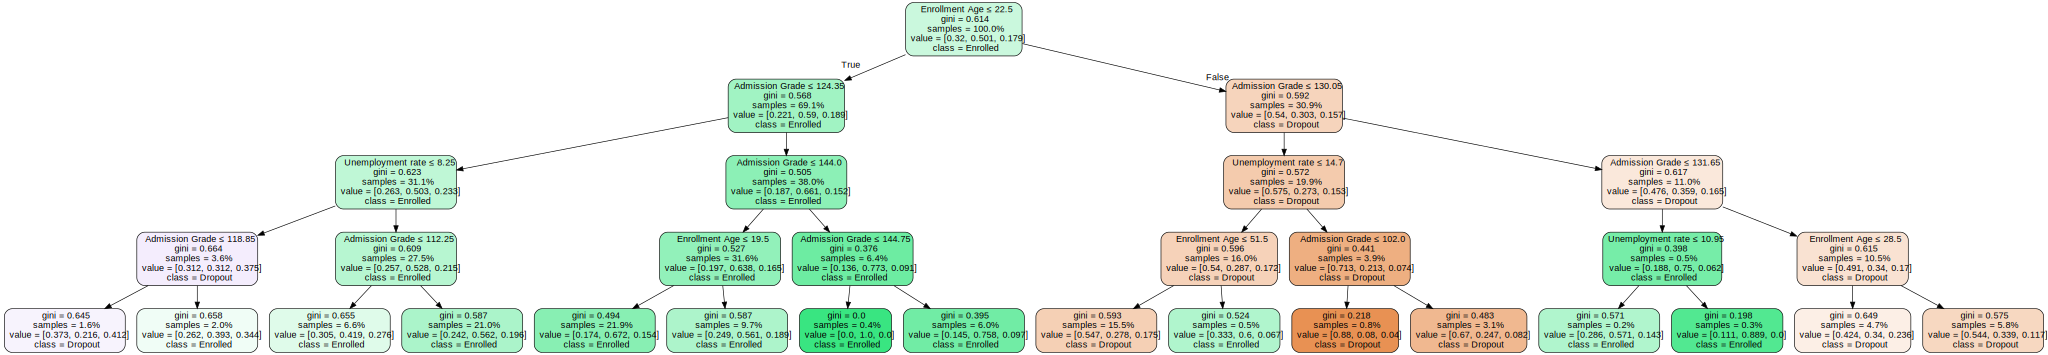

In [107]:
## One nice way to graph or Decision Tree using Gini Index.
## Probably will use this library, looks nicer.
## feature_names are all of our attributes we want to use.
## class_names are all 3 of our target values.
import graphviz
import math
labels_1 = target['Target'].map({0:'Dropout', 1:'Enrolled', 2:'Graduate'})
data = tree.export_graphviz(dtc_gini,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names = final_attributes.columns,
                            class_names = labels_1,
                            special_characters=True,
                            proportion=True)

##['Dropout', 'Enrolled', 'Graduate']
graph = graphviz.Source(data)
print('Gini Classification Report:\n', class_report_gini)
graph

Entropy Classification Report:
               precision    recall  f1-score   support

     Dropout     0.5060    0.4872    0.4965       431
    Enrolled     0.5649    0.7686    0.6512       657
    Graduate     0.1053    0.0083    0.0154       240

    accuracy                         0.5399      1328
   macro avg     0.3921    0.4214    0.3877      1328
weighted avg     0.4627    0.5399    0.4861      1328



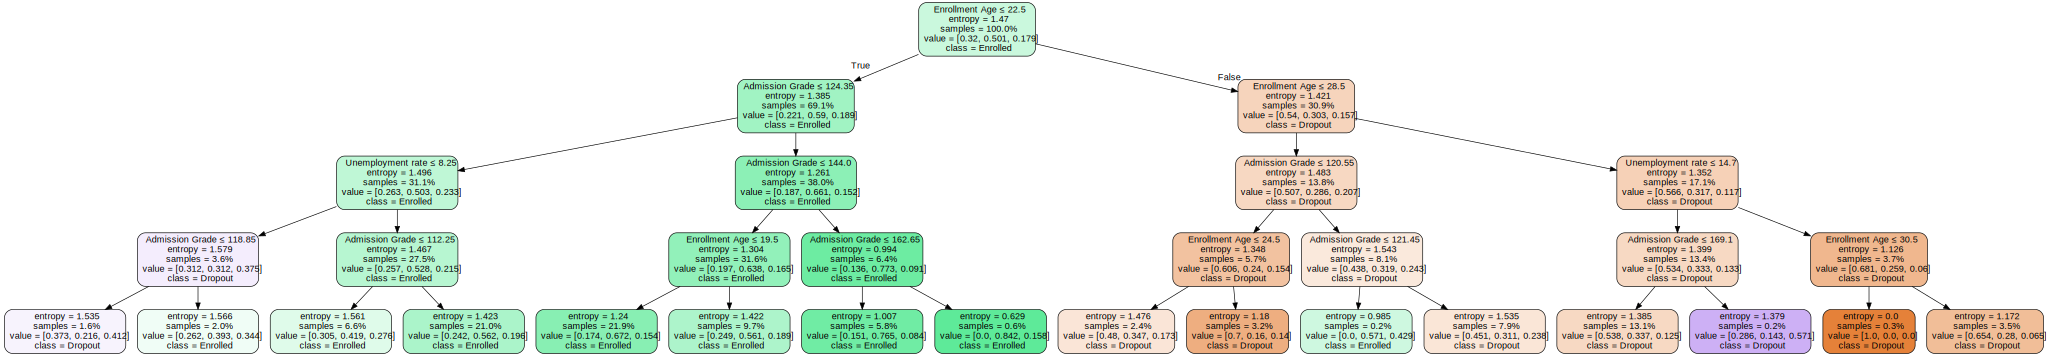

In [125]:
## Graphing Our Entropy Score
# Range is [0,log(c)], where c is the number of classes.
labels_2 = target['Target'].map({0:'Dropout', 1:'Enrolled', 2:'Graduate'})

data = tree.export_graphviz(dtc_entropy,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names = final_attributes.columns,
                            class_names = labels_2,
                            special_characters=True,
                            proportion=True)

#['Dropout', 'Enrolled', 'Graduate']
graph = graphviz.Source(data)
## Classification_report using our entropy variable
class_report_entropy = classification_report(y_test,
                                             y_pred_entropy,
                                             digits=4,
                                             target_names=['Dropout',
                                                           'Enrolled',
                                                           'Graduate'])
print('Entropy Classification Report:\n', class_report_entropy)
graph

[Text(0.5, 0.9, 'x[2] <= 23.5\ngini = 0.616\nsamples = 3539\nvalue = [1157, 1752, 630]'),
 Text(0.25, 0.7, 'x[0] <= 124.85\ngini = 0.581\nsamples = 2512\nvalue = [602.0, 1433.0, 477.0]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[3] <= 10.95\ngini = 0.624\nsamples = 1139\nvalue = [309, 569, 261]'),
 Text(0.0625, 0.3, 'x[0] <= 100.5\ngini = 0.654\nsamples = 480\nvalue = [143, 204, 133]'),
 Text(0.03125, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(0.09375, 0.1, 'gini = 0.652\nsamples = 473\nvalue = [143, 203, 127]'),
 Text(0.1875, 0.3, 'x[3] <= 12.55\ngini = 0.592\nsamples = 659\nvalue = [166.0, 365.0, 128.0]'),
 Text(0.15625, 0.1, 'gini = 0.537\nsamples = 295\nvalue = [56, 185, 54]'),
 Text(0.21875, 0.1, 'gini = 0.623\nsamples = 364\nvalue = [110, 180, 74]'),
 Text(0.375, 0.5, 'x[2] <= 19.5\ngini = 0.534\nsamples = 1373\nvalue = [293, 864, 216]'),
 Text(0.3125, 0.3, 'x[3] <= 10.95\ngini = 0.489\nsamples = 907\nvalue = [171, 613, 123]'),
 Text(0.28125, 0.1, 'gini 

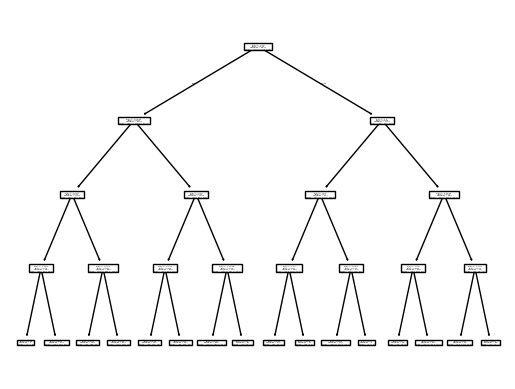

In [ ]:
## Different way of plotting
## I do not like how bland this turns out to be, so probably will not use.
tree.plot_tree(dtc_gini)

# [Extra Material] Neural Network Branch

Epoch 0, Loss: 1.1279
Epoch 10, Loss: 1.0081
Epoch 20, Loss: 0.9703
Test Accuracy: 75.45%


Text(0.5, 1.0, 'Adam Optimization Loss Curve')

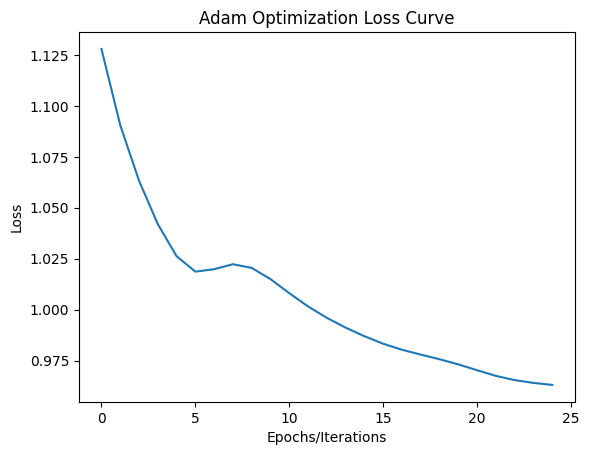

In [ ]:
# Importing necessary libraries from Pytorch
import torch
import torch.nn as nn
# Allows us to move our data forward through the nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# (1) Establishing variables from our numpy arrays
X = final_attributes_np  # Features/Attributes
y = target_np            # Target labels

# Splitting/training the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=100)

# Normalizing the input features w/ scalar transformations
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converting data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test  = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)  # Ensure target labels are integers
y_test  = torch.LongTensor(y_test)

# (2) Defining the Neural Network
class DropoutModel(nn.Module):
    # The Process of How this works..
    # Input layer ('n' features of the dataset) -->
    # Hidden Layer 1 (number of neurons) -->
    # HL2 (n) --> HL+1 (n) -->
    # Output (3 classes 'dropout'-->[0], 'enrolled'-->[1] , 'graduate'-->[2])
    ## in_features implies the # of attributes we want to use, so [4] atm
    ## out_feature implies the 3 rankings we have, the 3 classes commented above
    ## Working With 3 Hidden Layers [h1 has 16 neurons, h2 has 32, etc.]
    def __init__(self, in_features=3, h1=16, h2=32, h3=64, out_features=3):

        ## super() instantiates the nn.module
        super(DropoutModel, self).__init__()

        ## 'fc' implies 'fully-connected'
        ## This should be done for 'n' number of layers, we are using (3)
        ## Follows a snake-like structure
        self.fc1 = nn.Linear(in_features, h1)  ## Attributes --> Hidden1
        self.fc2 = nn.Linear(h1, h2)           ##    Hidden1 --> Hidden2
        self.fc3 = nn.Linear(h2, h3)           ##    Hidden2 --> Hidden3
        self.out = nn.Linear(h3, out_features) ##    Hidden3 --> Output

    ## Allows the data to move forward through the nn
    def forward(self, x):
        ## RELU stands for [RE]ctified [L]inear [U]nit
        ## More or less, if the output is < 0, call it 0 and move on
        ## output > 0, use that
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        return x

# (3) Instantiate the Model, Criterion/Loss Function, and Optimizer
model = DropoutModel(in_features = X_train.shape[1],
                     out_features = len(torch.unique(y_train)))

## Setting criterion for the model to measure our error.
criterion = nn.CrossEntropyLoss()

##                          Choosing an Optimizer
## Using Adam Optimizer - Designed to handle sparse gradients, noisy updates,
#                       and non-stationary objectives.
#         [Exponential moving averages of gradients & squared gradients]

##                        Setting Learning Rate
#             if error does not go down after many iterations (epochs)
#                        Lower the learning rate
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.01)


# (4) Training the Model
epochs = 25
losses = []

for epoch in range(epochs):
    # Forward pass the data through our nn
    y_pred = model.forward(X_train)

    # Ensure y_train is correctly formatted
    if len(y_train.shape) > 1:
        y_train = y_train.squeeze()
    if y_train.dtype != torch.int64:
        y_train = y_train.long()

    # Measures the loss/error [Should be high at first]
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    # Backward Propagation & optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs using modulo
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# (5) Evaluate the Model
with torch.no_grad():
    y_pred_test = model.forward(X_test)
    y_pred_classes = torch.argmax(y_pred_test, dim=1)
    accuracy = y_pred_classes.sum().item() / y_test.size(0)
    print(f"Test Accuracy: {accuracy*100:.2f}%")

# (6) Plot the Loss Curve
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)
plt.xlabel('Epochs/Iterations')
plt.ylabel('Loss')
plt.title('Adam Optimization Loss Curve')


In [ ]:
## Evaluating our model on the test data set instead of the train to see how
##  our loss compares
with torch.no_grad():
    ## Checking the shape of our y_test
    if len(y_test.shape) > 1:
        y_test = y_test.squeeze()
    if y_test.dtype != torch.int64:
        y_test = y_test.long()

    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

print(f'The loss over the entire test set is {loss:.4f}')
## This number should be close to the last epoch loss value, which it is!

The loss over the entire test set is 0.9651


Epoch 0, Loss: 1.1702
Epoch 1000, Loss: 1.0099
Epoch 2000, Loss: 0.9647
Epoch 3000, Loss: 0.9575
Epoch 4000, Loss: 0.9567
Epoch 5000, Loss: 0.9564
Epoch 6000, Loss: 0.9560
Epoch 7000, Loss: 0.9558
Epoch 8000, Loss: 0.9557
Epoch 9000, Loss: 0.9555
Test Accuracy: 71.75%


Text(0.5, 1.0, 'SGD Optimization Loss Curve')

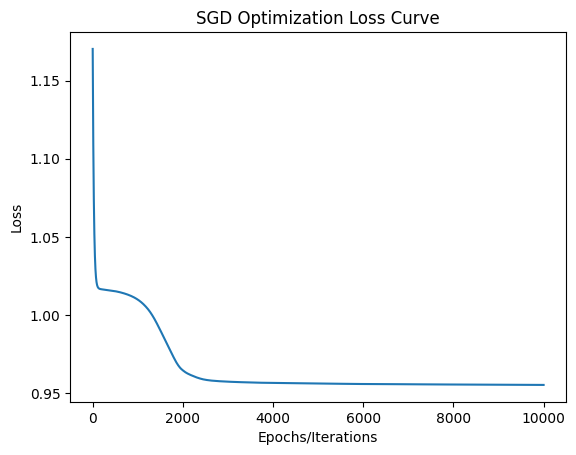

In [ ]:
##        This Second Neural Network Model has the following changes          ##

# Neural Layers     [4]            instead of [3]
# Neurons [2, 4, 8, 16]            '        ' [16, 32, 64]
# Epoch range is  [110]            '        ' [25]
# Test_size is    [0.2]            '        ' [0.3]
# Random_state is  [50]            '        ' [100]
# Using Optimizer [SGD]            '        ' [Adam]
# Learning rate  [0.03]            '        ' [0.01]
# Added momentum [0.02]


X2 = final_attributes_np  # Features/Attributes
y2 = target_np            # Target labels

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,
                                                    y2,
                                                    test_size=0.2,
                                                    random_state=50)

# Normalizing the input features via scalar transformations
scaler2 = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

# Convert data to PyTorch tensors
X_train2 = torch.FloatTensor(X_train2)
X_test2 = torch.FloatTensor(X_test2)
y_train2 = torch.LongTensor(y_train2)  # Ensure target labels are integers
y_test2 = torch.LongTensor(y_test2)

class DropoutModel_2(nn.Module):
    ## Using [4] Layers with this nn model HL --> 2^n+1
    def __init__(self, in_features=3, h1=2, h2=4, h3=8, h4=16, out_features=3):
        super(DropoutModel_2, self).__init__()
        ## 'fc' implies 'fully-connected'
        ## This should be done for 'n' number of layers, we are using (4)
        self.fc1 = nn.Linear(in_features, h1)  ## Attributes --> Hidden1
        self.fc2 = nn.Linear(h1, h2)           ##    Hidden1 --> Hidden2
        self.fc3 = nn.Linear(h2, h3)           ##    Hidden2 --> Hidden3
        self.fc4 = nn.Linear(h3, h4)           ##    Hidden3 --> Hidden4
        self.out = nn.Linear(h4, out_features) ##    Hidden4 --> Output

    ## Allows the data to move forward through the nn
    def forward(self, x):
        ## RELU stands for [RE]ctified [L]inear [U]nit
        ## More or less, if the output is < 0, call it 0 and move on
        ## output > 0, use that
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x

# Instantiate the Model, Criterion/Loss Function, and Optimizer
model_2 = DropoutModel_2(in_features = X_train2.shape[1],
                     out_features = len(torch.unique(y_train2)))

## Setting criterion of model to measure our error.
criterion2 = nn.CrossEntropyLoss()

## SGD Optimizer implements stochastic gradient descent (opt. w/ momentum).
#   commonly used in machine learning and deep learning to minimize a loss
#     function and improve model parameters (like weights and biases).

## Set Learning Rate --> If error does not go down after many iterations(epochs)
#  Lower the learning rate
optimizer2 = torch.optim.SGD(model_2.parameters(),
                             lr=0.03,
                             momentum=0.02)

# 110
# Training the Model
epochs2 = 10000
losses2 = []

for epoch in range(epochs2):
    # Forward pass the data through our nn
    y_pred2 = model_2.forward(X_train2)

    # Ensure y_train is correctly formatted
    if len(y_train2.shape) > 1:
        y_train2 = y_train2.squeeze()
    if y_train2.dtype != torch.int64:
        y_train2 = y_train2.long()

    # Measures the loss/error [Should be high at first]
    loss2 = criterion2(y_pred2, y_train2)
    losses2.append(loss2.item())

    # Backward Propagation & optimization
    optimizer2.zero_grad()
    loss2.backward()
    optimizer2.step()

    # Print loss every 10 epochs using modulo
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss2.item():.4f}")

# Evaluate the Model
with torch.no_grad():
    y_pred_test2 = model_2.forward(X_test2)
    y_pred_classes2 = torch.argmax(y_pred_test2, dim=1)
    accuracy2 = y_pred_classes2.sum().item() / y_test2.size(0)
    print(f"Test Accuracy: {accuracy2*100:.2f}%")

# Plot the Loss Curve
import matplotlib.pyplot as plt

plt.plot(range(epochs2), losses2)
plt.xlabel('Epochs/Iterations')
plt.ylabel('Loss')
plt.title('SGD Optimization Loss Curve')

In [ ]:
## Evaluating our model on the test data set instead of the train to see how
##  our loss compares
with torch.no_grad():
    ## Checking the shape of our y_test
    if len(y_test2.shape) > 1:
        y_test2 = y_test2.squeeze()
    if y_test2.dtype != torch.int64:
        y_test2 = y_test2.long()

    y_eval2 = model_2.forward(X_test2)
    loss2 = criterion2(y_eval2, y_test2)

print(f'The loss over the entire test set is {loss2:.4f}')

The loss over the entire test set is 0.9771


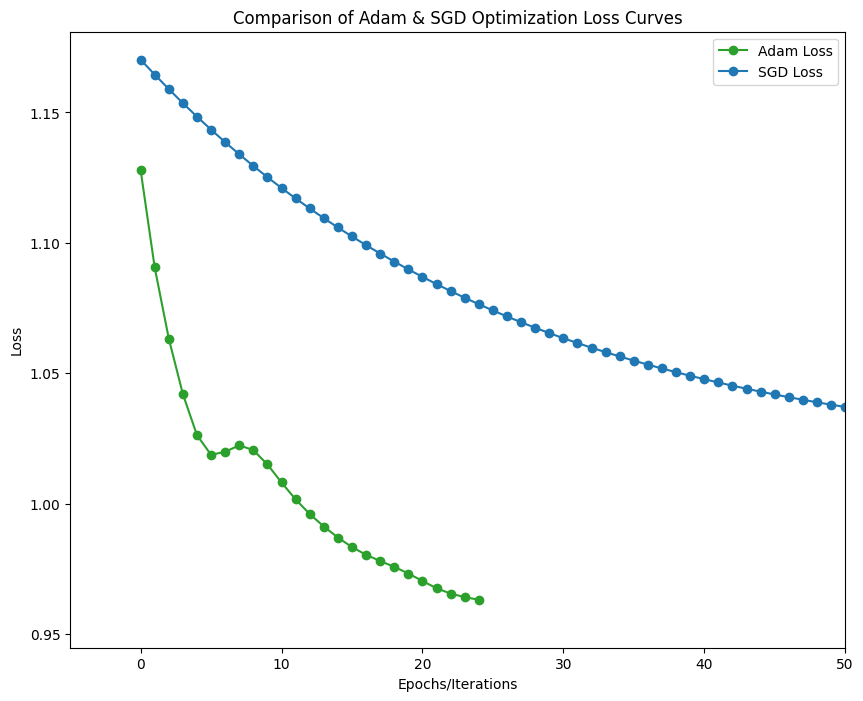

In [ ]:
## Plotting both loss curves on the same graph
plt.figure(figsize=(10, 8))
plt.plot(range(epochs), losses, label='Adam Loss', color='tab:green', marker='o')
plt.plot(range(epochs2), losses2, label='SGD Loss', color='tab:blue', marker='o')
plt.xlabel('Epochs/Iterations')
plt.xlim(-5, 50)
plt.ylabel('Loss')
plt.title('Comparison of Adam & SGD Optimization Loss Curves')
plt.legend()

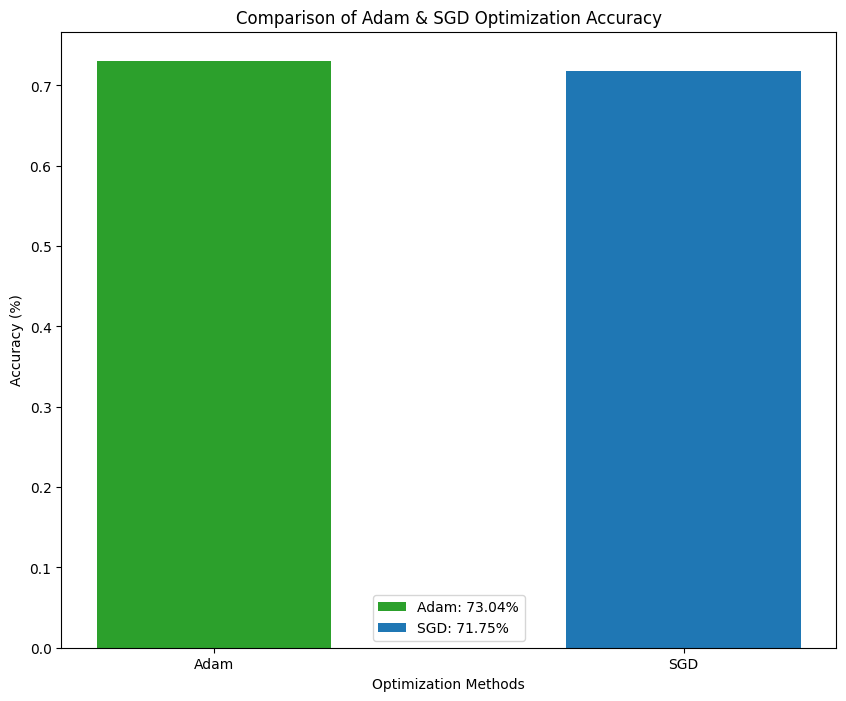

In [ ]:
## Plotting The Accuracy of Both Curves On The Same Graph
plt.figure(figsize=(10, 8))
plt.bar('Adam', accuracy, color='tab:green', label=f'Adam: {accuracy*100:.2f}%', width=0.5)
plt.bar('SGD', accuracy2, color='tab:blue', label=f'SGD: {accuracy2*100:.2f}%', width=0.5)
plt.xlabel('Optimization Methods')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Adam & SGD Optimization Accuracy')
plt.legend()
plt.show()

# MLP-Classifier Neural Network Branch

In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score


## Use of .ravel() to reshape the data.
y_train = y_train.ravel()
y_test = y_test.ravel()

## Our Neural Network Classifier using Adam optimization with 3 hidden layers.
mlp = MLPClassifier(hidden_layer_sizes=(2, 4, 8, 16),
                    solver='adam',
                    learning_rate_init=0.01,
                    random_state=150,
                    max_iter=150) #Epochs

## Our Neural Network Classifier using SGD Optimization with 4 hidden layers
mlp_SGD = MLPClassifier(hidden_layer_sizes=(8, 16, 32, 64, 128),
                        solver='sgd',
                        learning_rate_init=0.04,
                        max_iter=100, #Epochs
                        random_state=100,
                        momentum=0.1)


# Fitting the data to a new variable.
model_3 = mlp.fit(X_train, y_train)

model_SGD = mlp_SGD.fit(X_train, y_train)
# MLP trains using Backpropagation. More precisely, it trains using some form
# of gradient descent and the gradients are calculated using Backpropagation.
cross_entropy_loss = model_3.predict_proba(X_test)
cross_entropy_loss2 = model_SGD.predict_proba(X_test)

y_pred_test3 = model_3.predict(X_test)
y_pred_test3_SGD = model_SGD.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred_test3)
accuracy_SGD = accuracy_score(y_test, y_pred_test3_SGD)

print(f'Our Score For Accuracy using the Adam Opt. is: {accuracy3*100:.2f}%\n')
print(f'Our Score For Accuracy using the SGD Opt. is: {accuracy_SGD*100:.2f}%\n')

Our Score For Accuracy using the Adam Opt. is: 49.47%

Our Score For Accuracy using the SGD Opt. is: 53.61%



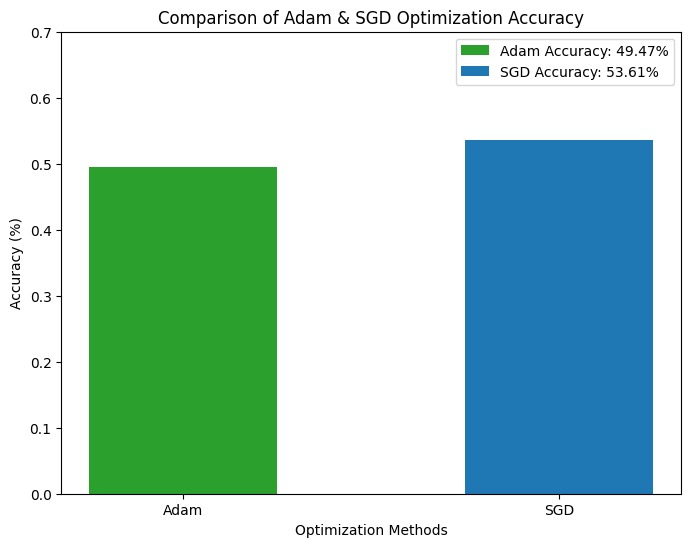

In [117]:
## Plotting The Accuracy of Both Curves On The Same Graph
plt.figure(figsize=(8, 6))
plt.ylim(0, 0.7)
plt.bar('Adam', accuracy3, color='tab:green', label=f'Adam Accuracy: {accuracy3*100:.2f}%', width=0.5)
plt.bar('SGD', accuracy_SGD, color='tab:blue', label=f'SGD Accuracy: {accuracy_SGD*100:.2f}%', width=0.5)
plt.xlabel('Optimization Methods')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Adam & SGD Optimization Accuracy')
plt.legend()
plt.show()

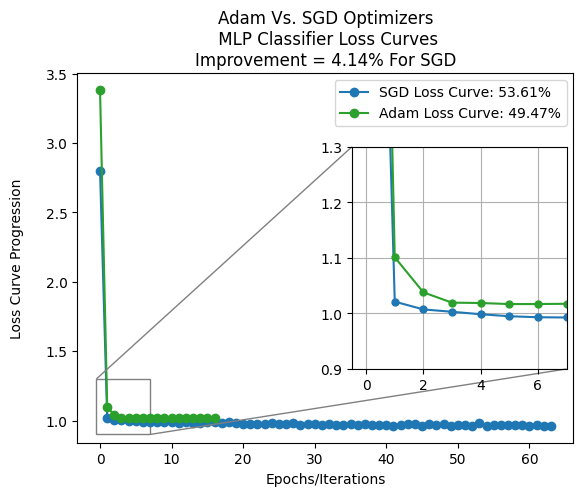

In [120]:
#https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.axes_grid1.inset_locator.mark_inset.html
## Creating a plot with a zoomed in portion in the top right
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
fig, ax = plt.subplots()

if accuracy3 > accuracy_SGD:
    diff = (accuracy3 - accuracy_SGD)* 100
    lead = 'Adam'
elif accuracy3 == accuracy_SGD:
    diff = 0
    lead = 'Both'
else:
    diff = (accuracy_SGD - accuracy3)* 100
    lead = 'SGD'

# Plotting the SGD loss curve
ax.plot(model_SGD.loss_curve_,
        label=f'SGD Loss Curve: {accuracy_SGD*100:.2f}%',
        marker='o',
        color='tab:blue')


# Plotting the Adam optimization loss curve
ax.plot(model_3.loss_curve_,
        label=f'Adam Loss Curve: {accuracy3*100:.2f}%',
        marker='o',
        color='tab:green')
ax.legend()

# labels, title, and legend for main plot
ax.set_xlabel('Epochs/Iterations')
ax.set_ylabel('Loss Curve Progression\n')
ax.set_title(f'Adam Vs. SGD Optimizers\n MLP Classifier Loss Curves\n\
Improvement = {diff:.2f}% For {lead}')

# zoomed-in inset w/ adjustment of zoom factor & position on the plot for Mini.
axins = zoomed_inset_axes(ax, zoom=4, loc='center right')


## Mini-Plot
axins.plot(model_SGD.loss_curve_,
           marker='o',
           markersize=5,
           color='tab:blue')

## Mini-Plot
axins.plot(model_3.loss_curve_,
           marker='o',
           markersize=5,
           color='tab:green')

# Set limits for the zoomed-in Mini-Plot
axins.set_xlim(-0.5, 7)  # Adjust based on your specific data
axins.set_ylim(0.9, 1.3)

# Add grid and remove ticks from the inset for clarity
axins.grid(True)
axins.tick_params(labelleft=True, labelbottom=True)

# Mark the zoomed area on the main plot
mark_inset(ax,
           axins,
           loc1=2,
           loc2=4,
           fc="none",
           ec="0.5",)

# Show the plot

plt.show()

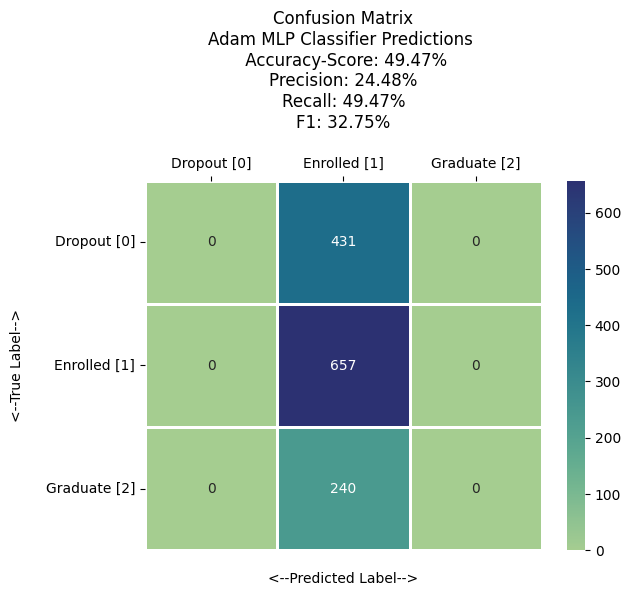

In [122]:
## Graphing A HeatMap for our Adams Optimization


nn_data = [X_train, X_test, y_train, y_test]
y_prediction_cm_1 = y_pred_test3
cm1 = confusion_matrix(nn_data[3], y_prediction_cm_1)

## Accuracy Per Matrix is under each Graph
# Creating a heatmap visualization of the confusion matrix.
ax = sns.heatmap(cm1,
                annot=True,
                fmt='d',
                cmap='crest',
                linewidth=1,
                xticklabels=['Dropout [0]', 'Enrolled [1]', 'Graduate [2]'],
                yticklabels=['Dropout [0]', 'Enrolled [1]', 'Graduate [2]'])

## Configuring Orientation of labels
ax.xaxis.tick_top()
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


accuracy_cm1 = np.sum(np.diag(cm1)) / np.sum(cm1)

# Precision, Recall, and F1 Score Metrics
precision_cm1 = precision_score(nn_data[3],
                                y_prediction_cm_1,
                                average='weighted',
                                zero_division=0)


recall_cm1 = recall_score(nn_data[3], y_prediction_cm_1, average='weighted')
f1_cm1 = f1_score(nn_data[3], y_prediction_cm_1, average='weighted')


plt.title(f"Confusion Matrix\nAdam MLP Classifier Predictions \
\n Accuracy-Score: {accuracy_cm1*100:.2f}%\nPrecision: {precision_cm1*100:.2f}%\n\
Recall: {recall_cm1*100:.2f}%\nF1: {f1_cm1*100:.2f}%\n")
plt.ylabel('<--True Label-->\n')
plt.xlabel('\n<--Predicted Label-->')

plt.show()

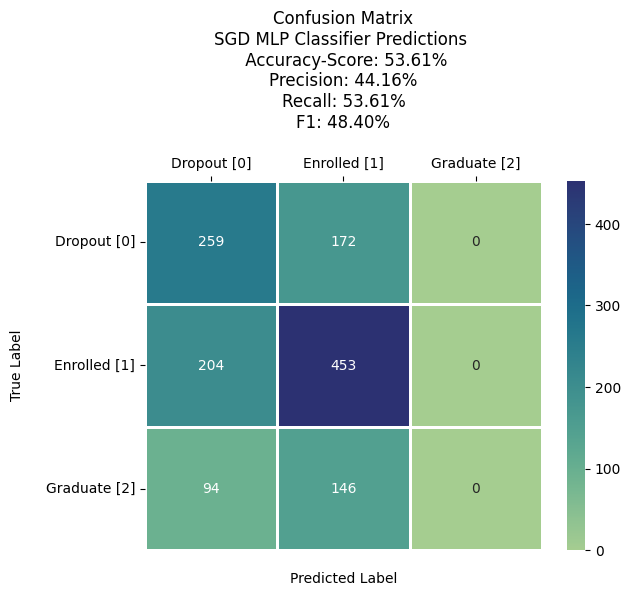

In [124]:
## Graphing a Heatmap for our SGD Optimization
y_prediction_cm2 = y_pred_test3_SGD
cm2 = confusion_matrix(nn_data[3], y_prediction_cm2)

ax2 = sns.heatmap(cm2,
            annot=True,
            fmt='d',
            cmap='crest',
            linewidth=1,
            xticklabels=['Dropout [0]', 'Enrolled [1]', 'Graduate [2]'],
            yticklabels=['Dropout [0]', 'Enrolled [1]', 'Graduate [2]'])

ax2.xaxis.tick_top()
ax2.set_yticklabels(ax.get_yticklabels(), rotation=0)

accuracy_cm2 = np.sum(np.diag(cm2)) / np.sum(cm2)

# Precision, Recall, and F1 Score Metrics
precision_cm2 = precision_score(nn_data[3],
                                y_prediction_cm2,
                                average='weighted',
                                zero_division=0)


recall_cm2 = recall_score(nn_data[3], y_prediction_cm2, average='weighted')
f1_cm2 = f1_score(nn_data[3], y_prediction_cm2, average='weighted')


plt.title(f"Confusion Matrix\nSGD MLP Classifier Predictions \
\n Accuracy-Score: {accuracy_cm2*100:.2f}%\nPrecision: {precision_cm2*100:.2f}%\n\
Recall: {recall_cm2*100:.2f}%\nF1: {f1_cm2*100:.2f}%\n")
plt.ylabel('True Label\n')
plt.xlabel('\nPredicted Label')

plt.show()